POLYNOMIAL REGRESSION RESULTS
Dataset: manufacturing.csv
Features: ['Temperature (°C)']
Target: Quality Rating
Polynomial Degree: 3
Mean Squared Error: 63.7470
R² Score: 0.6877


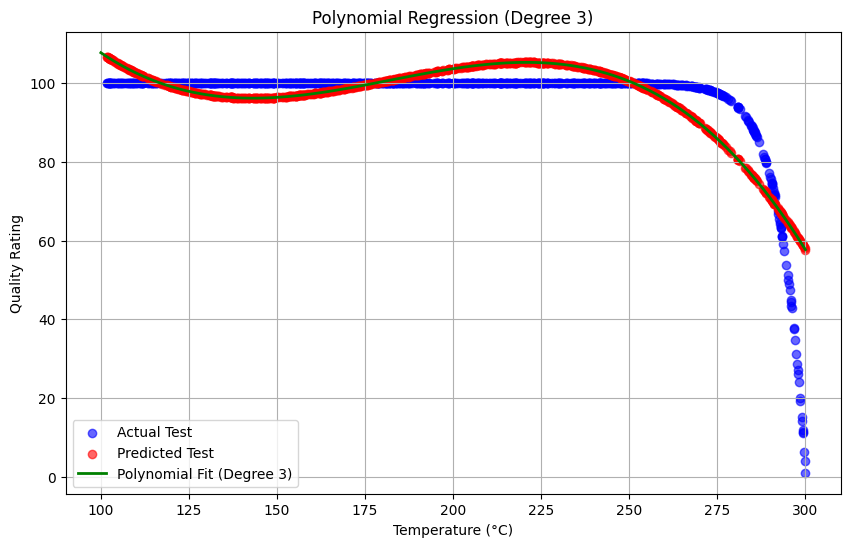

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

def polynomial_regression_from_csv(csv_file, target_col, degree=2, n_features=50):
    """
    Perform polynomial regression from CSV file using first N columns as features.
    
    Parameters:
    csv_file (str): Path to CSV file
    target_col (str): Target column name
    degree (int): Degree of polynomial
    n_features (int): Number of feature columns to use from the start
    """
    
    # Load data
    df = pd.read_csv(csv_file)
    
    # Select first N columns as features (excluding target if inside first N)
    feature_cols = [col for col in df.columns[:n_features] if col != target_col]
    
    # Prepare features and target
    X = df[feature_cols]
    y = df[target_col]
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Create polynomial pipeline
    poly_model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linear', LinearRegression())
    ])
    
    # Train model
    poly_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = poly_model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print results
    print("="*50)
    print("POLYNOMIAL REGRESSION RESULTS")
    print("="*50)
    print(f"Dataset: {csv_file}")
    print(f"Using First {n_features} Features")
    print(f"Target: {target_col}")
    print(f"Polynomial Degree: {degree}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")
    
    return poly_model, mse, r2


# Example usage
if __name__ == "__main__":
    # Replace with your CSV file path
    csv_file = "manufacturing.csv"
    
    # Replace with your target column
    target_column = "Quality Rating"  
    
    # Run polynomial regression using first 50 features
    model, mse, r2 = polynomial_regression_from_csv(
        csv_file, target_col=target_column, degree=2, n_features=50
    )
